In [1]:
import logging
import json
import random
import time
import numpy as np
import pickle
from gensim.models import doc2vec
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
from crashsimilarity.downloader import SocorroDownloader, Downloader
from crashsimilarity import utils
from itertools import islice

In [3]:
def corpus_generator(file_name):
    with open(file_name, 'r') as f:
        for i, line in enumerate(f):
            j = json.loads(line)
            stack_trace = j[0]
            yield doc2vec.TaggedDocument(stack_trace, [i])

In [5]:
gen = corpus_generator('data/new_clean_compressed.json')
# corpus = list(gen)

In [6]:
c = dict([(5 * i, Counter()) for i in [2,3,4,5,6,7]])
# for i, data in enumerate(corpus):
for i, data in enumerate(gen):
    if i % 100000 == 0:
        print(i)
    for k in c.keys():
        c[k][tuple(data[0][-k:])] += 1

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000


In [8]:
prefix = list(c[20].most_common(1)[0][0])

In [25]:
traces = []
for data in corpus_generator('data/new_clean_compressed.json'):
    tra = data[0]
    if tra[-20:] == prefix:
        traces.append(tra)

In [30]:
def lcs(a, b):
    lengths = [[0 for j in range(len(b)+1)] for i in range(len(a)+1)]
    # row 0 and column 0 are initialized to 0 already
    for i, x in enumerate(a):
        for j, y in enumerate(b):
            if x == y:
                lengths[i+1][j+1] = lengths[i][j] + 1
            else:
                lengths[i+1][j+1] = max(lengths[i+1][j], lengths[i][j+1])
    # read the substring out from the matrix
    result = []
    x, y = len(a), len(b)
    while x != 0 and y != 0:
        if lengths[x][y] == lengths[x-1][y]:
            x -= 1
        elif lengths[x][y] == lengths[x][y-1]:
            y -= 1
        else:
            assert a[x-1] == b[y-1]
            result = [(a[x-1], x-1, y-1)] + result
            x -= 1
            y -= 1
    return result

In [26]:
reversed_clean = []
for i in traces:
    reversed_clean.append(list(reversed(i))[20:])

In [38]:
data = dict()
for i in range(10): # range(len(reversed_clean)):
    # if i % 1000 == 0:
    #     print(i)
    for j in range(i+1, len(reversed_clean)):
        data[(i,j)] = lcs(reversed_clean[i], reversed_clean[j])

In [72]:
lengths = [len(i) for i in data.values()]
good = []
for k, v in data.items():
    if len(v) > 0:
        z = 0
        for _, x, y in v:
            if x != y:
                z += 1
        max_len = max(len(reversed_clean[k[0]]), len(reversed_clean[k[1]]))
        if z > 0:
            good.append((z, max_len, v))

In [75]:
good.sort(key=lambda x:float(x[0])/x[1], reverse=True)
good_len = [len(i[2]) for i in good]

In [76]:
good[:10]

[(7,
  13,
  [('214', 0, 0),
   ('201', 4, 6),
   ('200', 5, 7),
   ('204', 6, 8),
   ('199', 7, 9),
   ('198', 8, 10),
   ('197', 9, 11),
   ('196', 10, 12)]),
 (7,
  14,
  [('214', 0, 0),
   ('201', 4, 6),
   ('200', 5, 7),
   ('204', 6, 8),
   ('358', 7, 9),
   ('357', 8, 10),
   ('2215', 9, 11),
   ('356', 10, 12)]),
 (6,
  12,
  [('214', 0, 0),
   ('201', 4, 6),
   ('200', 5, 7),
   ('204', 6, 8),
   ('199', 7, 9),
   ('198', 8, 10),
   ('197', 9, 11)]),
 (6,
  13,
  [('214', 0, 0),
   ('201', 4, 6),
   ('200', 5, 7),
   ('204', 6, 8),
   ('358', 7, 9),
   ('357', 8, 10),
   ('90', 9, 12)]),
 (6,
  13,
  [('214', 0, 0),
   ('201', 4, 6),
   ('200', 5, 7),
   ('204', 6, 8),
   ('199', 7, 9),
   ('198', 8, 10),
   ('197', 9, 11)]),
 (6,
  13,
  [('214', 0, 0),
   ('201', 4, 6),
   ('200', 5, 7),
   ('204', 6, 8),
   ('199', 7, 9),
   ('198', 8, 10),
   ('197', 9, 11)]),
 (6,
  13,
  [('214', 0, 0),
   ('201', 4, 6),
   ('200', 5, 7),
   ('204', 6, 8),
   ('199', 7, 9),
   ('198', 8,

In [56]:
good[:10]

[[('214', 0, 0),
  ('213', 1, 1),
  ('212', 2, 2),
  ('211', 3, 3),
  ('210', 4, 4),
  ('209', 5, 5),
  ('208', 6, 6),
  ('1289', 7, 7),
  ('1288', 8, 8),
  ('1287', 9, 9),
  ('1637', 10, 10),
  ('1287', 11, 11),
  ('1286', 12, 14),
  ('1285', 13, 15),
  ('1284', 14, 16),
  ('831', 15, 17)],
 [('214', 0, 0),
  ('213', 1, 1),
  ('212', 2, 2),
  ('211', 3, 3),
  ('210', 4, 4),
  ('209', 5, 5),
  ('208', 6, 6),
  ('1289', 7, 7),
  ('1288', 8, 8),
  ('1287', 9, 9),
  ('1637', 10, 10),
  ('1287', 11, 11),
  ('1286', 12, 14),
  ('1285', 13, 15),
  ('1284', 14, 16),
  ('831', 15, 17)],
 [('214', 0, 0),
  ('213', 1, 1),
  ('212', 2, 2),
  ('211', 3, 3),
  ('210', 4, 4),
  ('209', 5, 5),
  ('208', 6, 6),
  ('1289', 7, 7),
  ('1288', 8, 8),
  ('1287', 9, 9),
  ('1637', 10, 10),
  ('1287', 11, 11),
  ('1286', 12, 14),
  ('1285', 13, 15),
  ('1284', 14, 16)],
 [('214', 0, 0),
  ('213', 1, 1),
  ('212', 2, 2),
  ('211', 3, 3),
  ('210', 4, 4),
  ('209', 5, 5),
  ('208', 6, 6),
  ('1289', 7, 7),
  (

In [32]:
a = lcs(reversed_clean[0], reversed_clean[1])
len(a)

1

In [19]:
traces[0]

['205',
 '206',
 '207',
 '208',
 '209',
 '210',
 '211',
 '212',
 '213',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '15',
 '68',
 '70',
 '23',
 '24',
 '72',
 '73',
 '220',
 '221',
 '125',
 '126',
 '156',
 '28',
 '29',
 '222']

In [16]:
len(traces)

5047

In [14]:
prefix

['215',
 '216',
 '217',
 '218',
 '219',
 '15',
 '68',
 '70',
 '23',
 '24',
 '72',
 '73',
 '220',
 '221',
 '125',
 '126',
 '156',
 '28',
 '29',
 '222']

In [15]:
end1, end2, end3 = list(c[35].most_common(3))

In [21]:
end1[1] + end2[1] + end3[1]

522

In [23]:
group1 = []
group2 = []
group3 = []
for i, c in enumerate(corpus):
    if tuple(c[0][-35:]) == end1[0]:
        group1.append(i)
    elif tuple(c[0][-35:]) == end2[0]:
        group2.append(i)
    elif tuple(c[0][-35:]) == end3[0]:
        group3.append(i)

In [29]:
dist = np.zeros((1000, 1000), dtype=np.float)
others = [random.randint(0, len(corpus)-1) for i in range(1000-522)]


(478, 1000)

In [1]:
def rwmd_distances(model, corpus, idx):
    model.init_sims(replace=True)

    words = corpus[idx].words
    words = [w for w in words if w in model]
    # Cos-similarity
    all_distances = np.array(1.0 - 
                             np.dot(model.wv.syn0norm, 
                                    model.wv.syn0norm[[model.wv.vocab[word].index for word in words]].transpose()), 
                             dtype=np.double)
    
    # Relaxed Word Mover's Distance for selecting
    t = time.time()
    distances = []
    for doc_id in range(0, len(corpus)):
        doc_words = [model.wv.vocab[word].index for word in corpus[doc_id].words if word in model]
        if len(doc_words) != 0:
            word_dists = all_distances[doc_words]
            rwmd = max(np.sum(np.min(word_dists, axis=0)), np.sum(np.min(word_dists, axis=1)))
        else:
            rwmd = float('inf')
        distances.append((doc_id, rwmd))

    # distances.sort(key=lambda v: v[1])
    logging.info('First part done in ' + str(time.time() - t) + ' s.')
    return distances

In [50]:
def create_sample(corpus, group, model, n=350):
    dist = np.zeros((n, n), dtype=np.float)
    sz = len(group)
    others = [random.randint(0, len(corpus)-1) for i in range(n-sz)]
    sample = []
    for i in (group + others):
        sample.append(corpus[i])
    for i in range(len(sample)):
        if i % 50 == 0:
            print(i)
        dist[i] = np.array(rwmd_distances(model, sample, i))[:,1]
    return dist

In [35]:
model = doc2vec.Doc2Vec.load('data/model/dm_d200_all.model')

In [51]:
dist = create_sample(corpus, group3, model)

0
50
100
150
200
250
300


In [53]:
from sklearn.manifold import MDS
clf = MDS()
X_mds = clf.fit_transform(dist)
X_mds.shape

/home/kirill/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


(350, 2)

/home/kirill/anaconda3/lib/python3.6/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


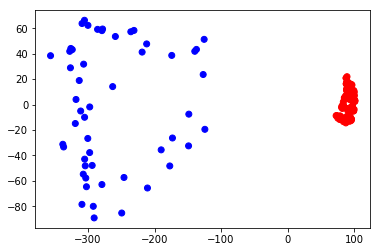

In [69]:
dist_200 = np.zeros((200, 200), dtype=np.float)
for i in range(len(dist_200)):
    dist_200[i] = dist[i][:200]
clf = MDS()
X_mds = clf.fit_transform(dist_200)
X_mds.shape
color = 'r' * len(group3) + 'b'*(len(dist_200) - len(group3))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=color)
plt.show()

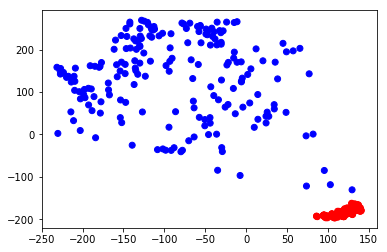

In [56]:
color = 'r' * len(group3) + 'b'*(len(dist) - len(group3))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=color)
plt.show()

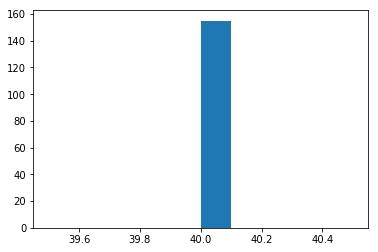

In [89]:
ll = [len(corpus[i].words) for i in group2]
plt.hist(ll)
plt.show()

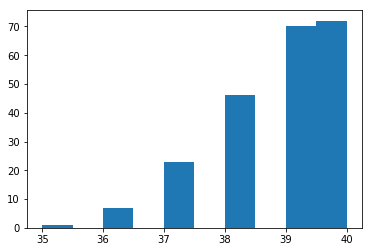

In [91]:
ll = [len(corpus[i].words) for i in group1]
plt.hist(ll)
plt.show()